In [1]:
import pandas

In [2]:
gpa = pandas.read_csv('gpa.csv')

In [4]:
dept_num = gpa.Course.str.extract(r'(\D+) (\d+)', expand=True)

In [5]:
dept_num.columns = ['Department', 'Course Number']

In [6]:
gpa = pandas.concat([dept_num, gpa.drop(['Course'], axis=1)], axis=1)

In [8]:
import matplotlib.pyplot as plt

In [31]:
quarter_mapping = {"Fall" : 0, "Win" : 1, "Spr" : 2, "Sum": 3 }

In [104]:
gpa["QuarterOrd"] = gpa.Quarter.apply(quarter_mapping.get)

C:\Users\Njand\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
gpa = gpa[gpa.Grade.str.match(r'[^\D]')]

In [12]:
gpa.Grade = gpa.Grade.astype('float')

C:\Users\Njand\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [13]:
gpa.dtypes

Department        object
Course Number     object
Course  Title     object
Credits            int64
Grade            float64
Grade Points     float64
Quarter           object
Year               int64
dtype: object

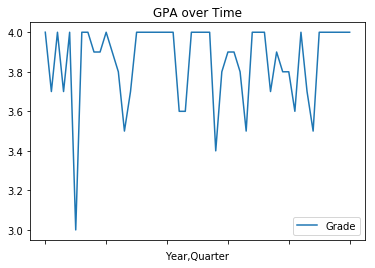

In [14]:
gpa.plot(x=['Year', 'Quarter'], y='Grade', title='GPA over Time', sharex="False")

In [62]:
gpa_per_quarter = gpa.groupby(['Year', 'QuarterOrd', "Quarter"]).apply(
    lambda x: (x['Grade'] * x['Credits']).sum() / x['Credits'].sum()
)

In [55]:
gpa_per_quarter

Year  QuarterOrd  Quarter
2013  0           Fall       4.000000
2014  0           Fall       3.727273
      1           Win        3.733333
      2           Spr        3.805882
      3           Sum        3.863636
2015  0           Fall       3.786667
      1           Win        3.728571
      2           Spr        4.000000
      3           Sum        4.000000
2016  0           Fall       4.000000
      1           Win        4.000000
      2           Spr        4.000000
2017  0           Fall       4.000000
      1           Win        3.663636
      2           Spr        3.923529
2018  1           Win        3.591667
      2           Spr        3.900000
dtype: float64

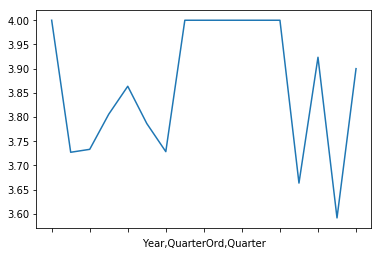

In [56]:
gpa_per_quarter.plot()

In [17]:
school_calendar_mapping = {2014: "Fre", 2015: "Sop", 2016: "Jun", 2017: "Sen", 2018: "Mas"}

In [18]:
gpa.Year.apply(school_calendar_mapping.get)

0      Mas
1      Mas
2      Mas
4      Mas
5      Mas
6      Mas
7      Sen
8      Sen
11     Sen
12     Sen
13     Sen
14     Sen
15     Sen
16     Sen
18     Sen
19     Jun
20     Jun
21     Jun
22     Jun
23     Jun
24     Jun
25     Jun
26     Sop
27     Sop
28     Sop
29     Sop
31     Sop
33     Sop
34     Sop
35     Sop
36     Sop
37     Sop
38     Fre
39     Fre
41     Fre
42     Fre
43     Fre
44     Fre
45     Fre
46     Fre
47     Fre
48     Fre
49     Fre
50     Fre
51     Fre
53     Fre
54    None
55    None
56    None
57    None
58    None
Name: Year, dtype: object

In [27]:
gpa["Standing"] = gpa.apply(
    lambda x: school_calendar_mapping.get(x.Year+1) if x.Quarter == "Fall" else school_calendar_mapping.get(x.Year),
    axis = 1
)

C:\Users\Njand\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


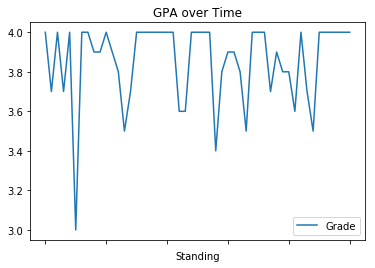

In [35]:
gpa.plot(x=['Standing'], y='Grade', title='GPA over Time', sharex="False")

In [80]:
gpa_per_quarter_df = pandas.DataFrame(gpa_per_quarter)

In [88]:
gpa_per_quarter_df = gpa_per_quarter_df.reset_index()

In [93]:
gpa_per_quarter_df["Standing"] = gpa_per_quarter_df.apply(
    lambda x: school_calendar_mapping.get(x.Year+1) if x.Quarter == "Fall" else school_calendar_mapping.get(x.Year),
    axis=1
)

In [94]:
gpa_per_quarter_df = gpa_per_quarter_df.rename(lambda x: "Grade" if x == 0 else x, axis='columns')

In [96]:
standing_ord = {"Fre": 0, "Sop": 1, "Jun": 2, "Sen": 3, "Mas": 4}

In [99]:
gpa_per_quarter_df["StandingOrd"] = gpa_per_quarter_df.Standing.apply(standing_ord.get)

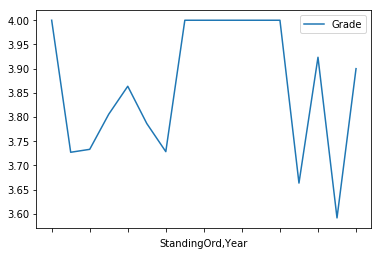

In [102]:
gpa_per_quarter_df.plot(x=["StandingOrd", "Year"], y="Grade")

In [103]:
gpa_per_quarter_df

,Year,QuarterOrd,Quarter,Grade,Standing,StandingOrd
0,2013,0,Fall,4.000000,Fre,0
1,2014,0,Fall,3.727273,Sop,1
2,2014,1,Win,3.733333,Fre,0
3,2014,2,Spr,3.805882,Fre,0
4,2014,3,Sum,3.863636,Fre,0
5,2015,0,Fall,3.786667,Jun,2
6,2015,1,Win,3.728571,Sop,1
7,2015,2,Spr,4.000000,Sop,1
8,2015,3,Sum,4.000000,Sop,1
9,2016,0,Fall,4.000000,Sen,3
